In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [7]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [8]:
def init_param():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [27]:
# L2范数惩罚项
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

# L1范数惩罚项
def l1_penalty(w):
    return torch.sum(torch.abs(w))

In [36]:
def train(lambd):
    w, b = init_param()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003

    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l1_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L1范数：', torch.norm(w, p=1).item())

w的L1范数： 139.92599487304688


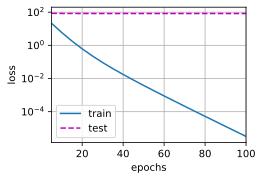

In [37]:
train(0)

w的L1范数： 0.9173100590705872


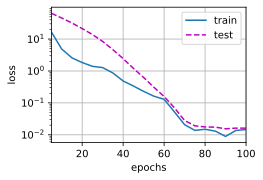

In [38]:
train(3)

w的L1范数： 0.24202360212802887


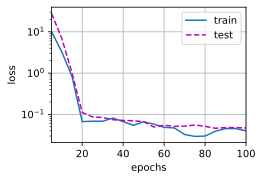

In [35]:
train(10)